In [1]:
from astropy.table import Table as Catalog
import utils
# import glob
# import numpy as np
# import matplotlib.pyplot as plt




# LRG 

In [2]:
target_4m_lrg = Catalog.read('/its/home/bb345/5-4most_data/CRS/target_catalogues/LRG/v4/target_lrg_4most_v4_shift_006.fits')


In [3]:
import os 
mask_dir='/its/home/bb345/1-research/1-4MOST/3-CRS/4-crs_tools/CRStools/mask_fp'
os.path.join(mask_dir,"desi-14k-footprint-dark.ecsv")

'/its/home/bb345/1-research/1-4MOST/3-CRS/4-crs_tools/CRStools/mask_fp/desi-14k-footprint-dark.ecsv'

In [4]:
target_4m_lrg

RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,DCHISQ,EBV,FLUX_G,FLUX_R,FLUX_I,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_I,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_I,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_I,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_I,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_I,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_I,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_I,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_I,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_I,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_I,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_I,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_I,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,WISE_COADD_ID,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_I,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_I,FIBERTOTFLUX_Z,REF_CAT,REF_ID,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,MASKBITS,FITBITS,SERSIC,SERSIC_IVAR,Z_SPEC,SURVEY,Z_PHOT_MEAN,Z_PHOT_MEDIAN,Z_PHOT_STD,Z_PHOT_L68,Z_PHOT_U68,Z_PHOT_L95,Z_PHOT_U95,TRAINING,KFOLD,Z_PHOT_MEAN_I,Z_PHOT_MEDIAN_I,Z_PHOT_STD_I,Z_PHOT_L68_I,Z_PHOT_U68_I,Z_PHOT_L95_I,Z_PHOT_U95_I,TRAINING_I,KFOLD_I,isfoots8
int16,int32,bytes8,int32,bytes3,float64,float64,float32,float32,float32[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,uint8,float32,float32,float32,float32,float32,float32,int32,int16,float32,float32,float32,bytes12,float32,float32,float32,float32,float32,float32,float32,bool,int16,float32,float32,float32,float32,float32,float32,float32,bool,int16,bool
10000,120120,3030m397,780,DEV,302.95451245540414,-39.76906973438819,36765893000.0,33208156000.0,1975.8184 .. 2214.9722,0.0576311,0.14792606,0.9841116,3.379552,6.7605333,27.68061,17.17046,-75.05502,-1210.329,252.8618,193.67471,129.3832,11.8370075,2.7850454,0.6017718,0.00083349366,2.7142721e-06,0.84315896,0.89143866,0.91896826,0.9377423,0.9902808,0.99401987,0.9987216,0.9995171,3,2,5,1,203,190,13,13,0.9424918,0.97711116,0.97896445,1.2809496,0.9221179,0.46657443,0.5592773,0.12513897,0.54862845,0.05533188,0.022198102,0.005160431,0.2804545,0.43843842,0.82249475,1.6195552,0.07066077,0.045174252,0.047550812,0.03639327,0.9985572,0.9993176,0.9991081,0.9994948,0,0,0,0,0,0,0,0,0,0,1.5558536,1.5739707,1.3910636,1.053156,591.03174,454.74435,339.64307,37.553112,369.39825,294.5344,196.81323,18.05963,4.610271,0.8106605,3038m394,0.6293663,1049.0565,0.0467133,580.52844,0.0139568625,274.6882,0.06500772,0.43247858,1.485181,2.9709902,0.065478355,0.43331337,1.4863566,2.9723816,,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4.0,0.0,-99.

In [5]:
s8=(target_4m_lrg['isfoots8']==True)

In [6]:
nobs_list = ['NOBS_R', 'NOBS_G', 'NOBS_I', 'NOBS_Z']

/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))


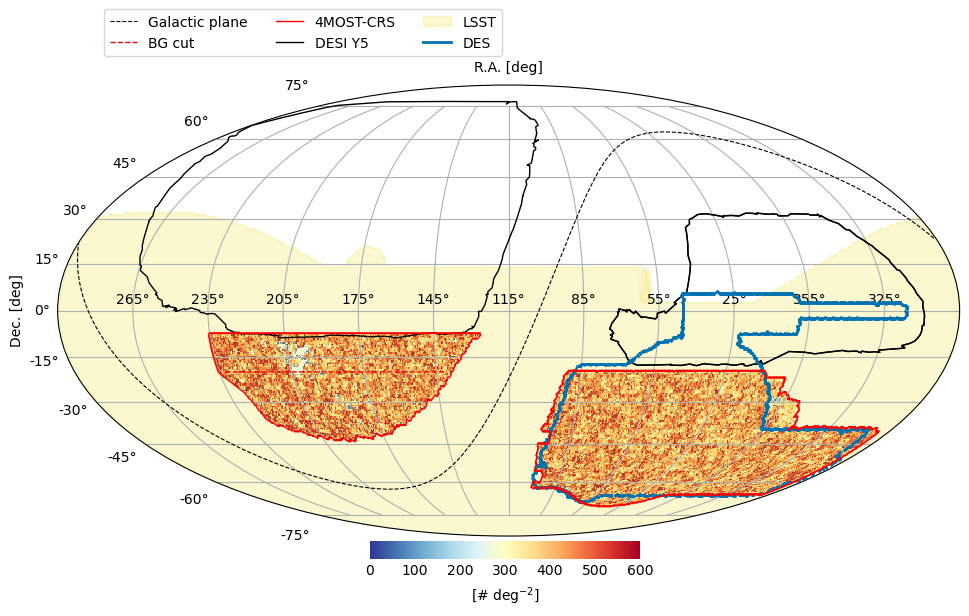

In [10]:
# plot Sky map
hpmap = utils.create_hp_map(target_4m_lrg['RA'][target_4m_lrg['isfoots8']==True], target_4m_lrg['DEC'][s8], nside=128)
hpmap_ebv = utils.create_hp_map(target_4m_lrg['RA'][s8], target_4m_lrg['DEC'][s8], weight=target_4m_lrg['NOBS_R'][s8], nside=128)

# utils.plot_moll(hpmap, rot=115, min=30, max=100, desi_footprint=True, fourmost_footprint=True, euclid_fp=False, des_fp=True, lsst_fp=True)
utils.plot_moll(hpmap, rot=115, min=0, max=600, desi_footprint=True, fourmost_footprint=True, euclid_fp=False, des_fp=True, lsst_fp=True)


/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/CRStools/utils.py:647: RuntimeWarning: invalid value encountered in divide
  m = hp.ma(hmap) if whmap is None else hp.ma(whmap/hmap)
/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/CRStools/utils.py:687: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_xticklabels(tick_labels)  # horizontal colorbar


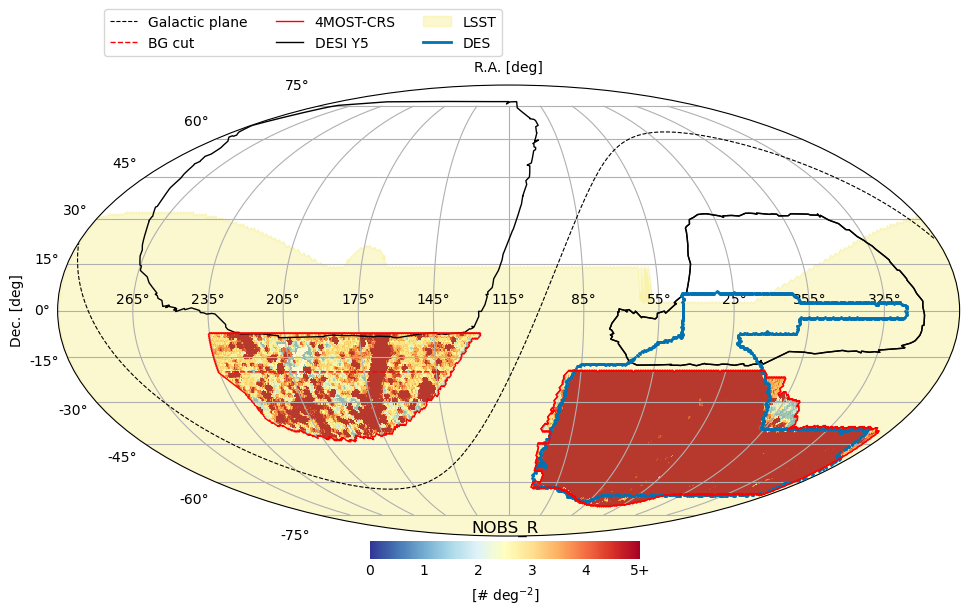

/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/CRStools/utils.py:647: RuntimeWarning: invalid value encountered in divide
  m = hp.ma(hmap) if whmap is None else hp.ma(whmap/hmap)
/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/CRStools/utils.py:687: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_xticklabels(tick_labels)  # horizontal colorbar


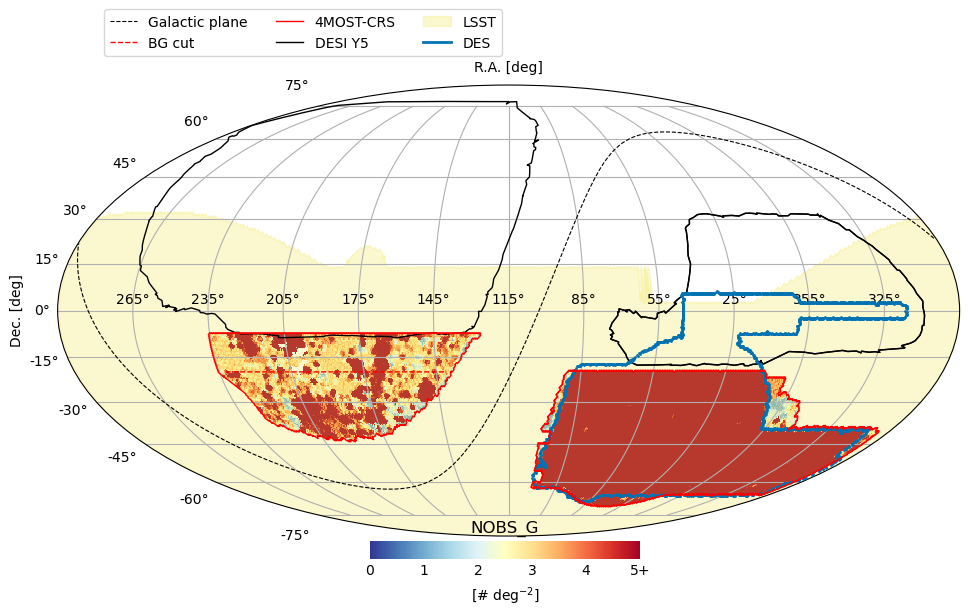

/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/CRStools/utils.py:647: RuntimeWarning: invalid value encountered in divide
  m = hp.ma(hmap) if whmap is None else hp.ma(whmap/hmap)
/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/CRStools/utils.py:687: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_xticklabels(tick_labels)  # horizontal colorbar


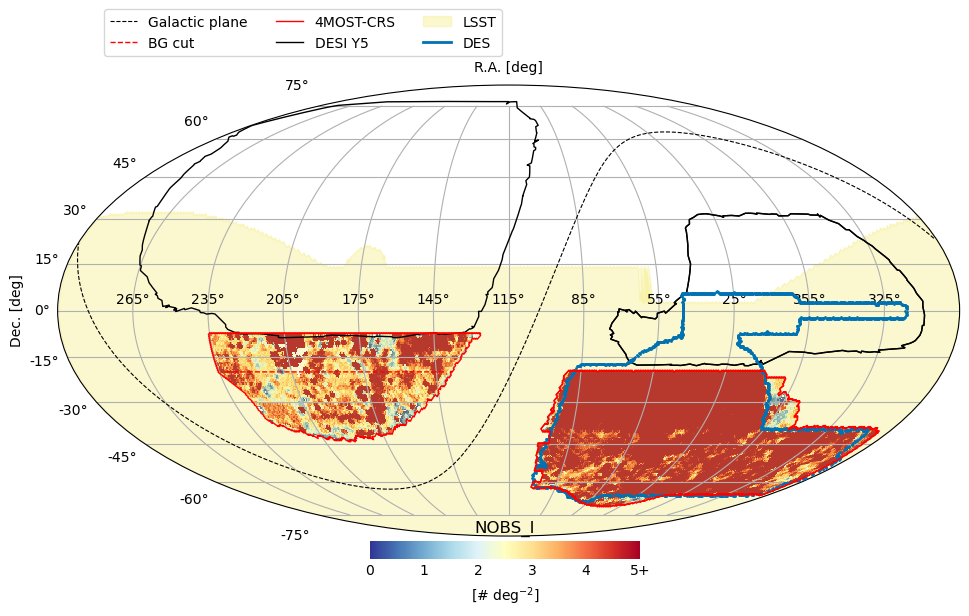

/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/CRStools/utils.py:647: RuntimeWarning: invalid value encountered in divide
  m = hp.ma(hmap) if whmap is None else hp.ma(whmap/hmap)
/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/CRStools/utils.py:687: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_xticklabels(tick_labels)  # horizontal colorbar


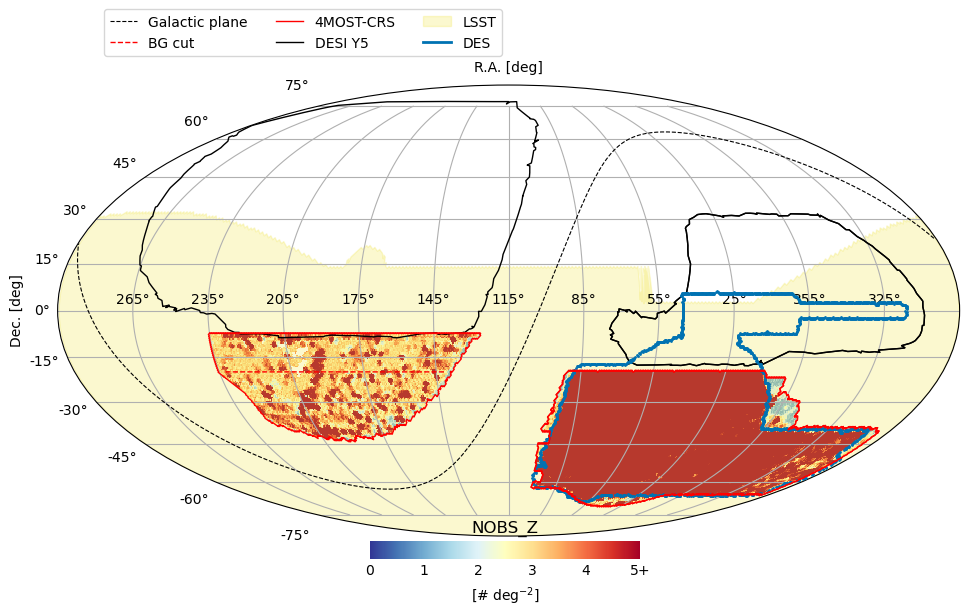

In [46]:
for nobs in nobs_list:
    hpmap_ebv = utils.create_hp_map(target_4m_lrg['RA'][s8], target_4m_lrg['DEC'][s8], weight=target_4m_lrg[nobs][s8], nside=128)
    utils.plot_moll(hpmap, hpmap_ebv, rot=115, min=0, max=5, desi_footprint=True, fourmost_footprint=True, euclid_fp=False, des_fp=True, lsst_fp=True, title=nobs, tick_labels=[0, 1, 2, 3, 4, '5+'])

/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/CRStools/utils.py:647: RuntimeWarning: invalid value encountered in divide
  m = hp.ma(hmap) if whmap is None else hp.ma(whmap/hmap)
/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))


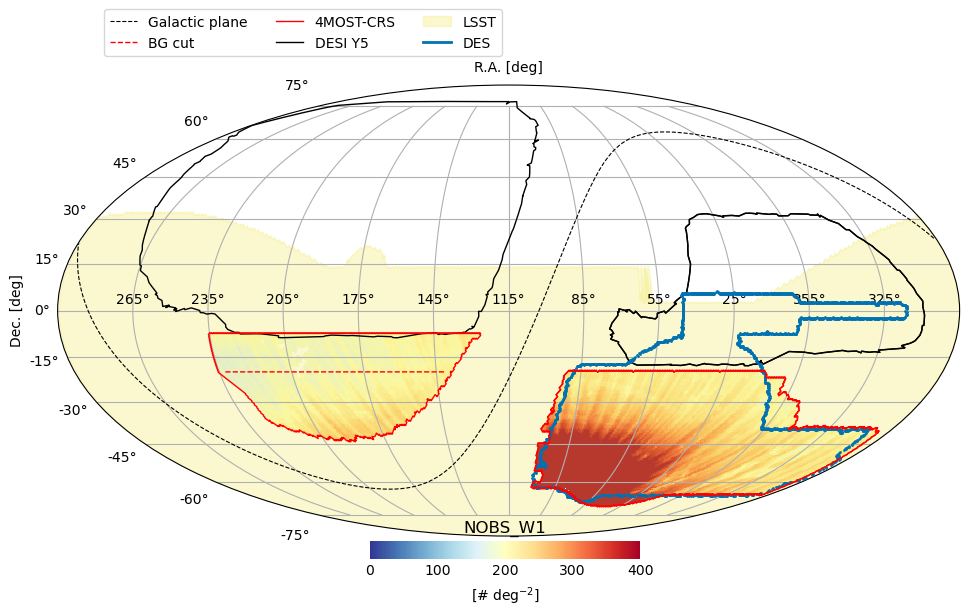

In [44]:

hpmap_ebv = utils.create_hp_map(target_4m_lrg['RA'][s8], target_4m_lrg['DEC'][s8], weight=target_4m_lrg['NOBS_W1'][s8], nside=128)
utils.plot_moll(hpmap, hpmap_ebv, rot=115, min=0, max=400, desi_footprint=True, fourmost_footprint=True, euclid_fp=False, des_fp=True, lsst_fp=True, title='NOBS_W1')

In [5]:
#Select point inside the footprint
mask_s8fp = utils.get_4most_s8foot(target_4m_lrg['RA'], target_4m_lrg['DEC'])

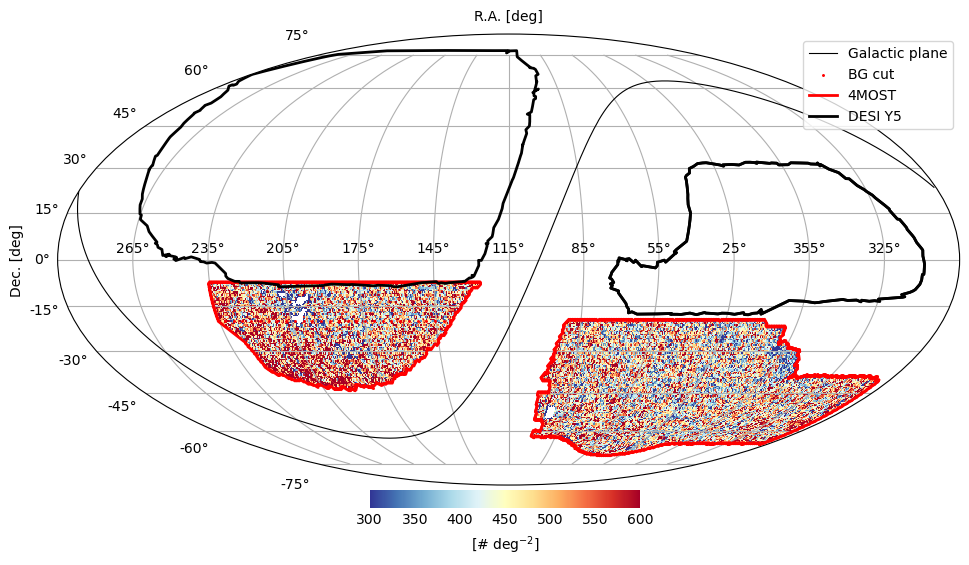

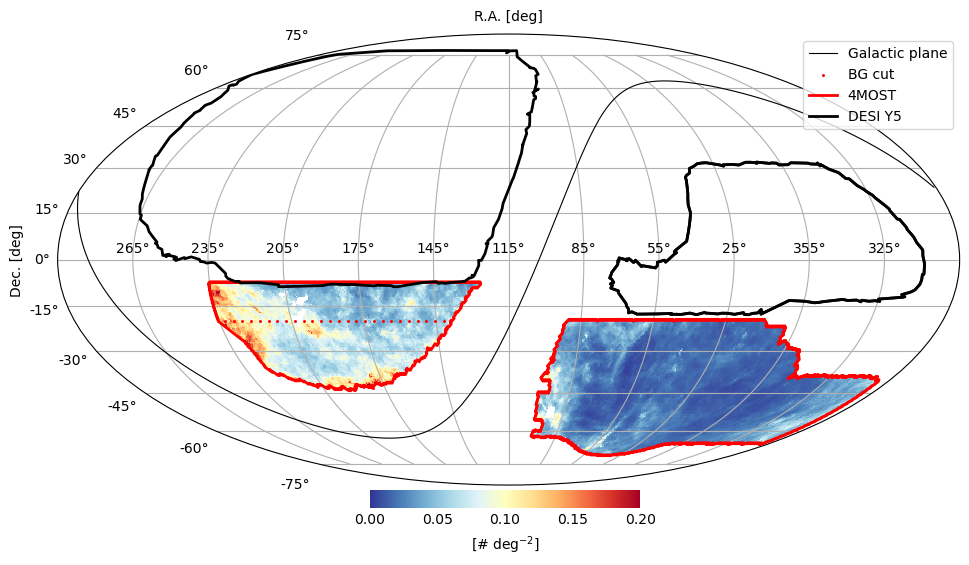

In [6]:
hpmap = utils.create_hp_map(target_4m_lrg['RA'][mask_s8fp], target_4m_lrg['DEC'][mask_s8fp], nside=128)
hpmap_ebv = utils.create_hp_map(target_4m_lrg['RA'][mask_s8fp], target_4m_lrg['DEC'][mask_s8fp], weight=target_4m_lrg['EBV'][mask_s8fp], nside=128)
utils.plot_moll(hpmap, rot=115, min=300, max=600, desi_footprint=True, fourmost_footprint=True)
utils.plot_moll(hpmap, hpmap_ebv, rot=115, min=0, max=0.2, desi_footprint=True, fourmost_footprint=True)

In [ ]:
utils.get_4most_skyaera()

# BG 

In [7]:
target_4m_bg = Catalog.read([f'/pscratch/sd/a/arocher/4MOST/target_bg_4most_new_{reg}_mag_r19.fits' for reg in ['ngc', 'sgc']])


In [ ]:
hpmap = utils.create_hp_map(target_4m_lrg['RA'], target_4m_lrg['DEC'], nside=128)
hpmap_ebv = utils.create_hp_map(target_4m_lrg['RA'], target_4m_lrg['DEC'], weight=target_4m_lrg['EBV'], nside=128)

utils.plot_moll(hpmap, rot=115, min=300, max=600, desi_footprint=True, fourmost_footprint=True)
utils.plot_moll(hpmap, hpmap_ebv, rot=115, min=0, max=0.2, desi_footprint=True, fourmost_footprint=True)

In [ ]:
#Select point inside the footprint

mask_s8fp = utils.get_4most_s8foot(target_4m_lrg['RA'], target_4m_lrg['DEC'], bg_fp=True)

In [ ]:
hpmap = utils.create_hp_map(target_4m_lrg['RA'][mask_s8fp], target_4m_lrg['DEC'][mask_s8fp], nside=128)
hpmap_ebv = utils.create_hp_map(target_4m_lrg['RA'][mask_s8fp], target_4m_lrg['DEC'][mask_s8fp], weight=target_4m_lrg['EBV'][mask_s8fp], nside=128)
utils.plot_moll(hpmap, rot=115, min=300, max=600, desi_footprint=True, fourmost_footprint=True)
utils.plot_moll(hpmap, hpmap_ebv, rot=115, min=0, max=0.2, desi_footprint=True, fourmost_footprint=True)

In [ ]:
utils.get_4most_skyaera(bg_fp=True)